In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("survey.csv")

In [4]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [5]:
unique_genders = df['Gender'].unique()
unique_genders

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [6]:
gender_mapping = {
    'Male': ['M', 'male', 'm', 'Male-ish', 'maile', 'Cis Male', 'Man', 'msle', 'Mail', 'Malr', 'Cis Man','something kinda male?' 'Mal','Male (CIS)','Make','Guy (-ish) ^_^','male leaning androgynous' ,'Male ','ostensibly male, unsure what that really means','Mal'],
    'Female': ['Female', 'female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail','Trans-female' 'Cis Female','Trans woman','Female (trans)','Trans-female', 'Cis Female'],
}

# function to map the values
def map_gender(gender):
    for category, values in gender_mapping.items():
        if gender.lower() in [value.lower() for value in values]:
            return category
    return gender  # If the value doesn't match any mapping, keep it as is

# mapping function to the "Gender" column
df['Gender'] = df['Gender'].apply(map_gender)

# Verify the changes
unique_genders = df['Gender'].unique()
print(unique_genders)

['Female' 'Male' 'something kinda male?' 'queer/she/they' 'non-binary'
 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer' 'Androgyne' 'Agender' 'Neuter'
 'queer' 'A little about you' 'p']


In [7]:
df = df[df['Gender'].isin(['Male', 'Female'])]

# Verify the changes
unique_genders = df['Gender'].unique()
print(unique_genders)

['Female' 'Male']


In [8]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [9]:
df = df.drop(["Timestamp", "comments", "state"], axis =1)

In [10]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [11]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(f"Age Range: {min_age} to {max_age}")

Age Range: -1726 to 329


In [12]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 55)]

# Verify the changes
print(df['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 54 55 48 20 47 51 49 53]


In [13]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [14]:
empty_values = df.isna().sum()
print(empty_values)

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               259
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


In [15]:
df = df.drop(["work_interfere"], axis =1)

In [16]:
encoders = dict()
enc_no_employees = {'1-5':0, '6-25':1, '26-100':2, '100-500':3, '500-1000':4, 'More than 1000':5}
surv_no_employees = df.no_employees.apply(lambda row: enc_no_employees[row])

enc_leave = {'Somewhat easy':3, "Don't know":2, 'Somewhat difficult':1,
       'Very difficult':0, 'Very easy':4}
surv_leave = df.leave.apply(lambda row: enc_leave[row])

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
for x in range(2,23):
    encoders['le'+str(x-2)]= LabelEncoder()
    df.iloc[:,x] = encoders['le'+str(x-2)].fit_transform(df.iloc[:,x].astype(str))
df['leave'] = surv_leave
df['no_employees'] = surv_no_employees
df.head()

C:\Users\sneha\AppData\Local\Temp\ipykernel_25776\114192215.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,x] = encoders['le'+str(x-2)].fit_transform(df.iloc[:,x].astype(str))
C:\Users\sneha\AppData\Local\Temp\ipykernel_25776\114192215.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,x] = encoders['le'+str(x-2)].fit_transform(df.iloc[:,x].astype(str))
C:\Users\sneha\AppData\Local\Temp\ipykernel_25776\114192215.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values 

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,44,2,0,1,1,0,1,2,...,2,3,1,1,1,2,1,0,2,0
1,44,Male,44,2,0,0,5,0,0,0,...,0,2,0,1,0,0,1,1,0,0
2,32,Male,6,2,0,0,1,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,Male,43,2,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,Male,44,2,0,0,3,1,1,2,...,0,2,1,1,1,2,2,2,0,0


In [19]:
from sklearn.impute import SimpleImputer

In [20]:
labels = df.columns
imp = SimpleImputer(strategy='most_frequent')
survey = pd.DataFrame(imp.fit_transform(df), columns=labels)

In [21]:
import matplotlib.pyplot as plt

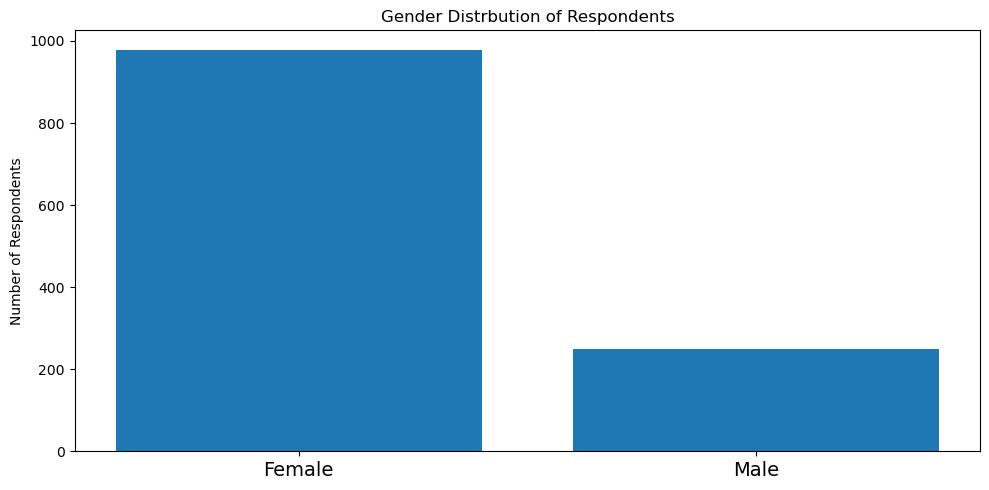

In [22]:
plt.figure(figsize =(10,5))
plt.bar(survey.Gender.value_counts().index, survey.Gender.value_counts())
xticks = plt.gca()
plt.xticks([0,1], ['Female','Male'])
plt.gca().set_xticklabels(['Female', 'Male'], fontsize = 14)
plt.title('Gender Distrbution of Respondents')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

In [23]:
import numpy as np

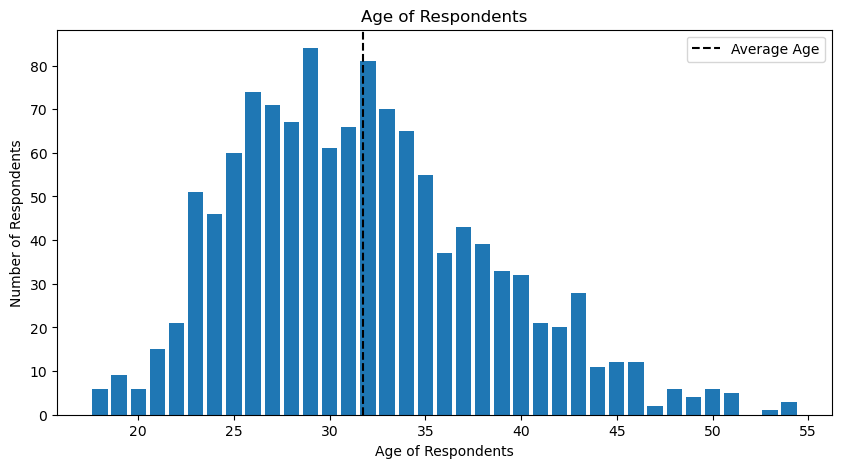

In [24]:
survey = survey[survey.Age>15]
survey = survey[survey.Age<55]

plt.figure(figsize =(10,5))
survey.Age.value_counts()
plt.bar(survey.Age.value_counts().index, survey.Age.value_counts())
plt.title('Age of Respondents')
plt.ylabel('Number of Respondents')
plt.xlabel('Age of Respondents')
av_age = np.mean(survey.Age)
plt.axvline(av_age,
           color = 'black',
           linestyle = '--'
           , label='Average Age')
plt.legend()
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_25776\4190673980.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(survey.Country.value_counts().index[0:10],rotation =90, fontsize = 14)


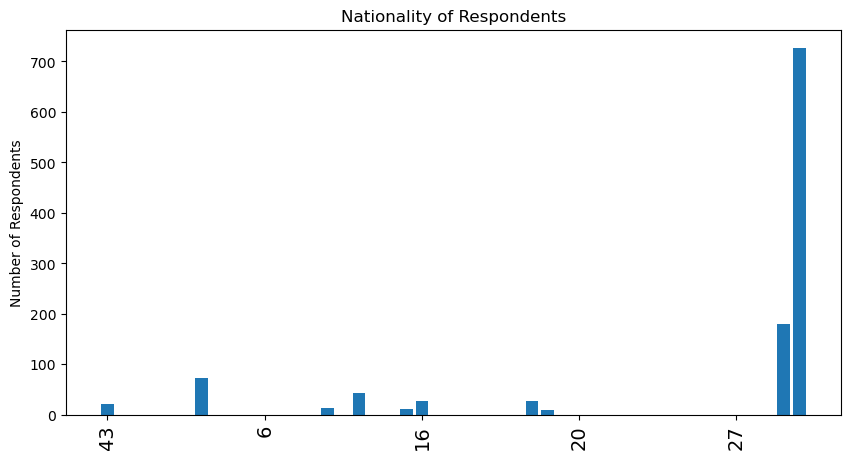

In [25]:
plt.figure(figsize =(10,5))
plt.bar(survey.Country.value_counts().index[0:10], survey.Country.value_counts()[0:10])
plt.title('Nationality of Respondents')
plt.ylabel('Number of Respondents')
plt.gca().set_xticklabels(survey.Country.value_counts().index[0:10],rotation =90, fontsize = 14)
plt.show()

In [26]:
survey = survey.drop(["Age", "Gender","Country"], axis = 1)


In [27]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN #For clustering
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [28]:
def inertia_plot( clust, X, start = 2, stop = 10):
    #A simple inertia plotter to decide K in KMeans
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (10,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia Decrease with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

In [29]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    # Taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km = clust(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

c:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sneha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

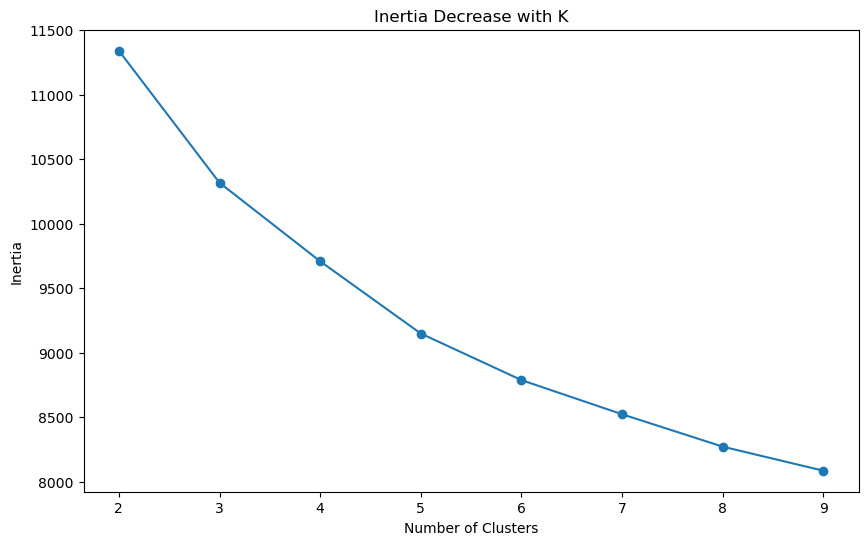

In [30]:
inertia_plot(KMeans, survey)

In [33]:
for x in range(2,8):
    ag = KMeans(n_clusters = x, )
    label = ag.fit_predict(survey)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(survey, label))

Silhouette-Score for 2 Clusters:  0.19043385447939856
Silhouette-Score for 3 Clusters:  0.14158230679292164
Silhouette-Score for 4 Clusters:  0.12007300585349012
Silhouette-Score for 5 Clusters:  0.11635185137559363
Silhouette-Score for 6 Clusters:  0.11791522901964967
Silhouette-Score for 7 Clusters:  0.10826115166836951


In [32]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

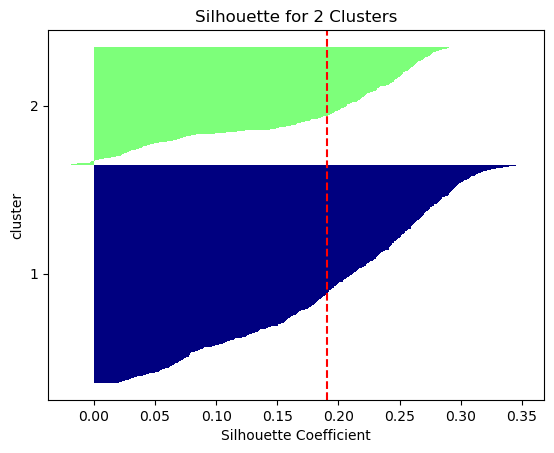

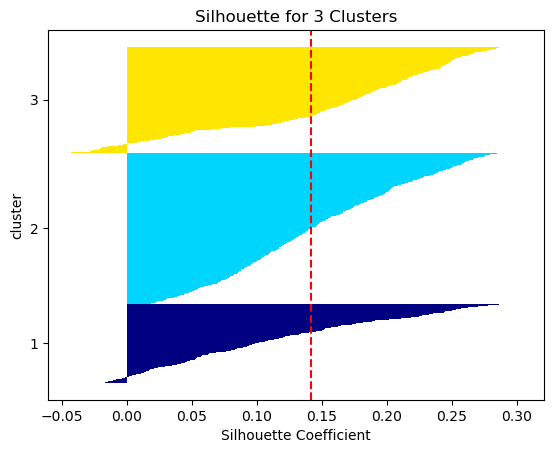

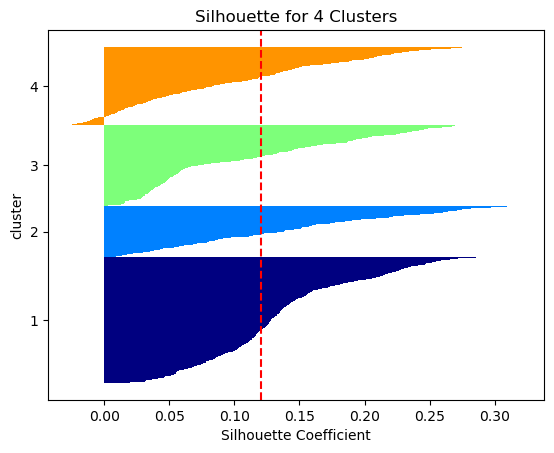

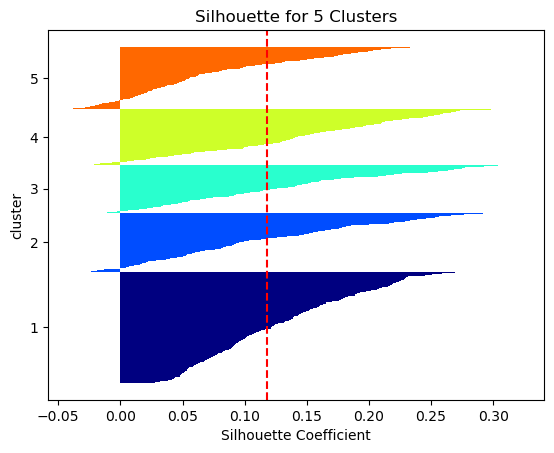

In [34]:
silh_samp_cluster(KMeans, survey, stop =6)

In [35]:
for x in range(2,8):
    ag = AgglomerativeClustering(n_clusters = x, )
    label = ag.fit_predict(survey)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(survey, label))

Silhouette-Score for 2 Clusters:  0.19715641010028298
Silhouette-Score for 3 Clusters:  0.1311356413755606
Silhouette-Score for 4 Clusters:  0.12245069135522359
Silhouette-Score for 5 Clusters:  0.10688867310043268
Silhouette-Score for 6 Clusters:  0.07527565025260793
Silhouette-Score for 7 Clusters:  0.08085220411989764


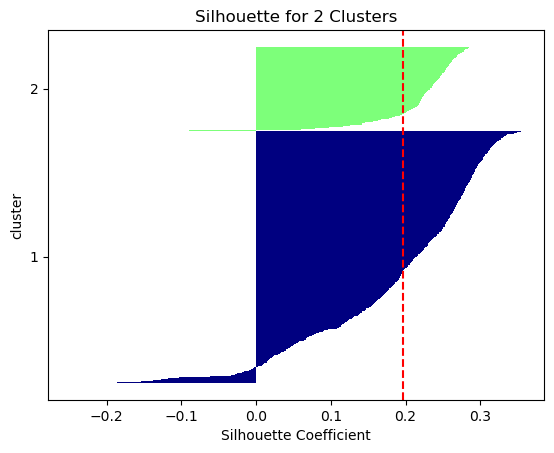

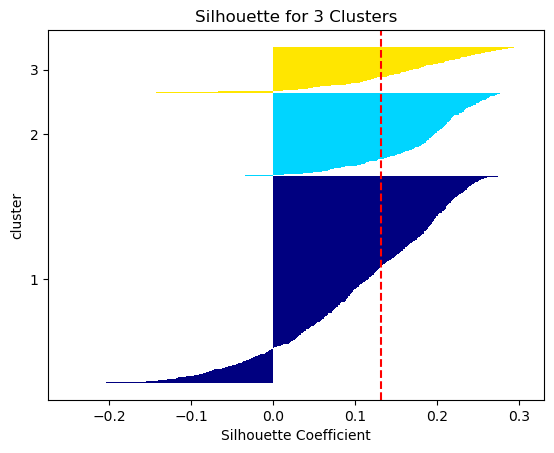

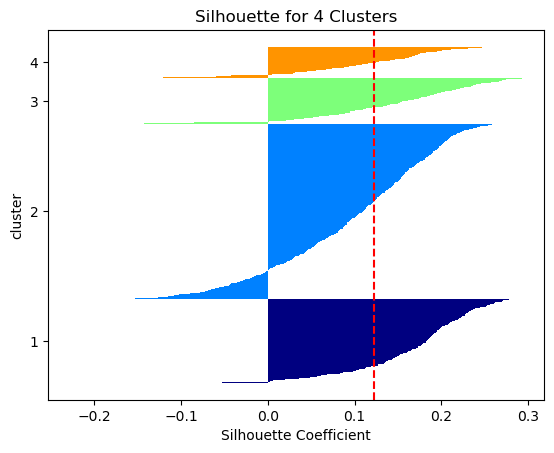

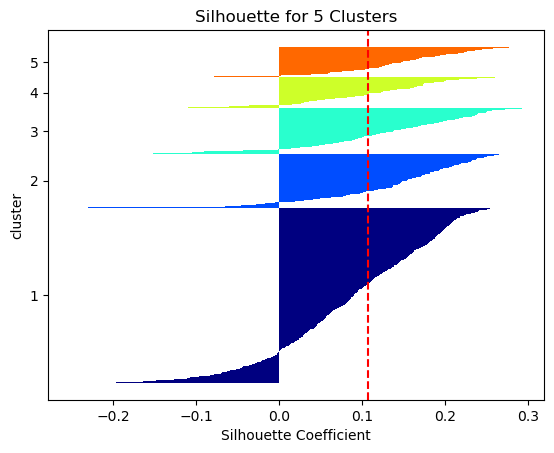

In [36]:
silh_samp_cluster(AgglomerativeClustering, survey, stop =6)


In [37]:
from sklearn.decomposition import PCA
for y in range(2,6):
    print("PCA with # of components: ", y)
    pca = PCA(n_components =y)
    survey_p = pca.fit_transform(survey)
    for x in range(2, 9):
        ag = KMeans(n_clusters = x, )
        label = ag.fit_predict(survey_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(survey_p, label) , '       Inertia: ',ag.inertia_)
    print()


PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.43520744009569184        Inertia:  3088.0715046777036
Silhouette-Score for 3 Clusters:  0.40739651271178073        Inertia:  2079.354964960285
Silhouette-Score for 4 Clusters:  0.38722817553971134        Inertia:  1562.3865752771226
Silhouette-Score for 5 Clusters:  0.38507724064575694        Inertia:  1191.816389057024
Silhouette-Score for 6 Clusters:  0.3894855849005299        Inertia:  982.0387114980368
Silhouette-Score for 7 Clusters:  0.38221824627304474        Inertia:  833.1025818030838
Silhouette-Score for 8 Clusters:  0.3793816644203444        Inertia:  733.2368988294404

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.35051162129478736        Inertia:  4630.528357619002
Silhouette-Score for 3 Clusters:  0.3046882022673816        Inertia:  3621.5087267762524
Silhouette-Score for 4 Clusters:  0.2931211700124149        Inertia:  3030.1052714630932
Silhouette-Score for 5 Clusters:  0.291001084483925

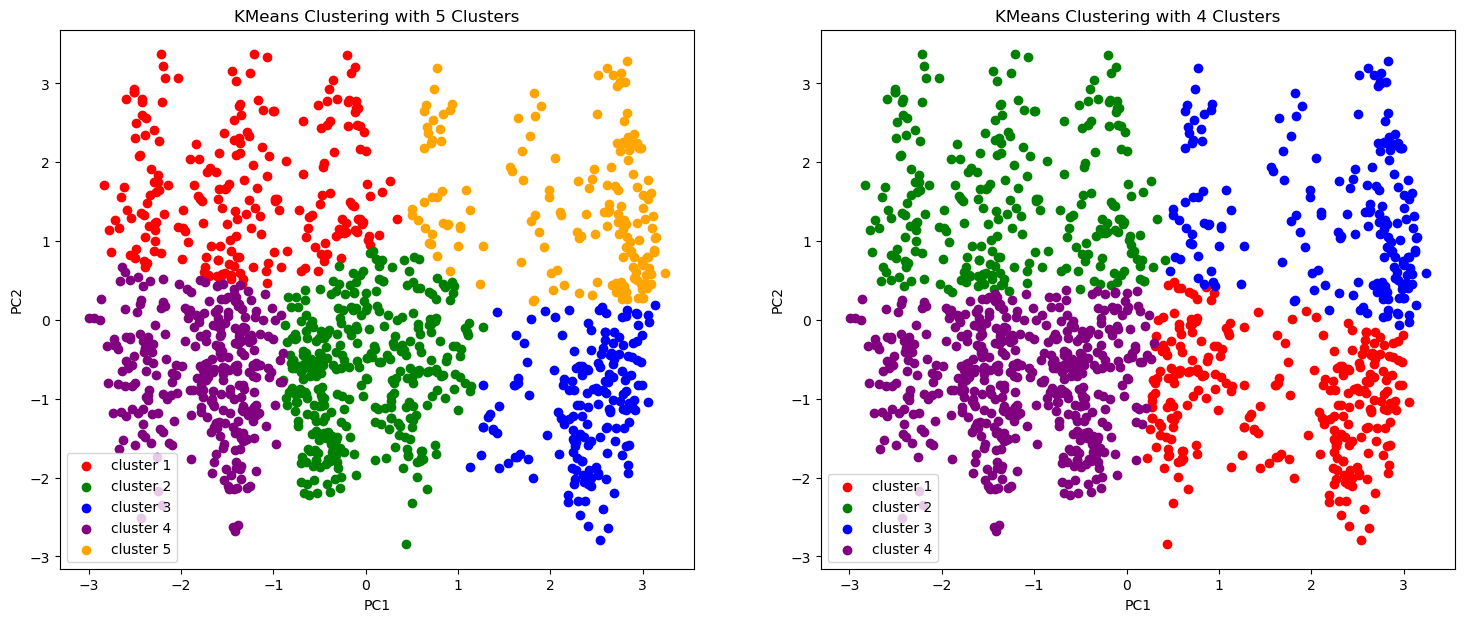

In [38]:
survey_p = pd.DataFrame(PCA(n_components = 2).fit_transform(survey))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(survey_p))
survey_p = pd.concat([survey_p, preds], axis =1)
survey_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.subplot(121)
plt.scatter(survey_p[survey_p['target']==0].iloc[:,0], survey_p[survey_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(survey_p[survey_p['target']==1].iloc[:,0], survey_p[survey_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(survey_p[survey_p['target']==2].iloc[:,0], survey_p[survey_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(survey_p[survey_p['target']==3].iloc[:,0], survey_p[survey_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(survey_p[survey_p['target']==4].iloc[:,0], survey_p[survey_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

survey_p = pd.DataFrame(PCA(n_components = 2).fit_transform(survey))
preds = pd.Series(KMeans(n_clusters = 4,).fit_predict(survey_p))
survey_p = pd.concat([survey_p, preds], axis =1)
survey_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(survey_p[survey_p['target']==0].iloc[:,0], survey_p[survey_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(survey_p[survey_p['target']==1].iloc[:,0], survey_p[survey_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(survey_p[survey_p['target']==2].iloc[:,0], survey_p[survey_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(survey_p[survey_p['target']==3].iloc[:,0], survey_p[survey_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.legend()
plt.title('KMeans Clustering with 4 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

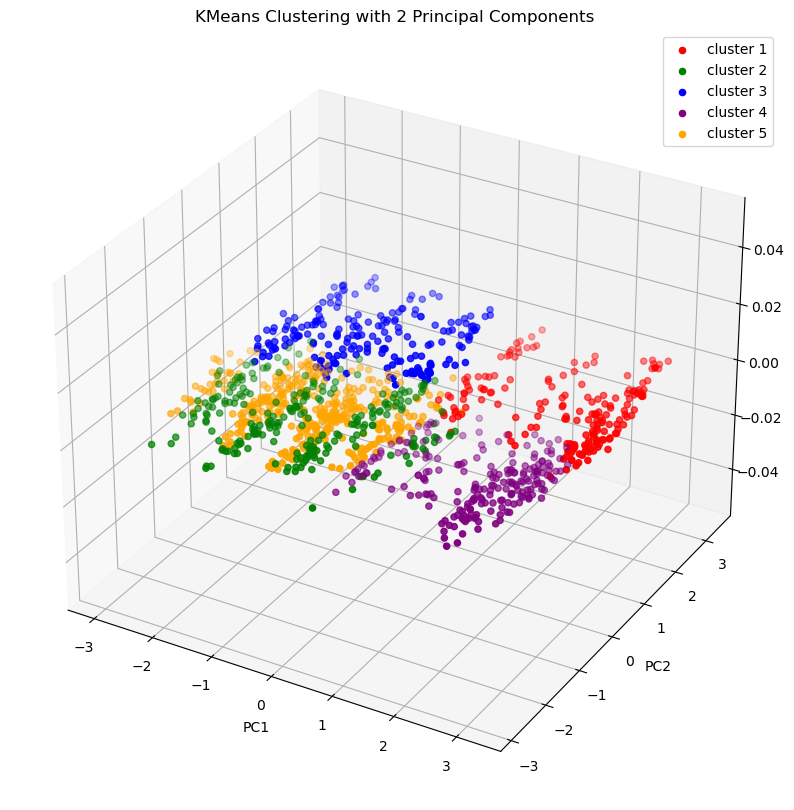

In [39]:
from mpl_toolkits.mplot3d import Axes3D

survey_p3 = pd.DataFrame(PCA(n_components = 3).fit_transform(survey))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(survey_p3))
survey_p3 = pd.concat([survey_p3, preds], axis =1)
survey_p3.columns = [0,1,2, 'target']

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue', 'purple', 'orange']
ax.scatter(survey_p3[survey_p3['target']==0].iloc[:,0], survey_p3[survey_p3.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
ax.scatter(survey_p3[survey_p3['target']==1].iloc[:,0], survey_p3[survey_p3.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
ax.scatter(survey_p3[survey_p3['target']==2].iloc[:,0], survey_p3[survey_p3.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
ax.scatter(survey_p3[survey_p3['target']==3].iloc[:,0], survey_p3[survey_p3.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
ax.scatter(survey_p3[survey_p3['target']==4].iloc[:,0], survey_p3[survey_p3.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [40]:
for y in range(2,6):
    print("PCA with # of components: ", y)
    pca = PCA(n_components =y)
    survey_p = pca.fit_transform(survey)
    for x in range(2, 9):
        ag = AgglomerativeClustering(n_clusters = x, )
        label = ag.fit_predict(survey_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(survey_p, label))
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.4502261754841877
Silhouette-Score for 3 Clusters:  0.3146461072757683
Silhouette-Score for 4 Clusters:  0.3354463346371557
Silhouette-Score for 5 Clusters:  0.3481654042538056
Silhouette-Score for 6 Clusters:  0.33866161746650053
Silhouette-Score for 7 Clusters:  0.32945833341035835
Silhouette-Score for 8 Clusters:  0.31614706010580185

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3669502102820312
Silhouette-Score for 3 Clusters:  0.23875267220526875
Silhouette-Score for 4 Clusters:  0.23869125795691284
Silhouette-Score for 5 Clusters:  0.23184756632477949
Silhouette-Score for 6 Clusters:  0.22283655508326153
Silhouette-Score for 7 Clusters:  0.2246031148002949
Silhouette-Score for 8 Clusters:  0.24017324417145186

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.3259413660368448
Silhouette-Score for 3 Clusters:  0.2321664107142716
Silhouette-Score for 4 Clusters:  0.23936064208496474
S

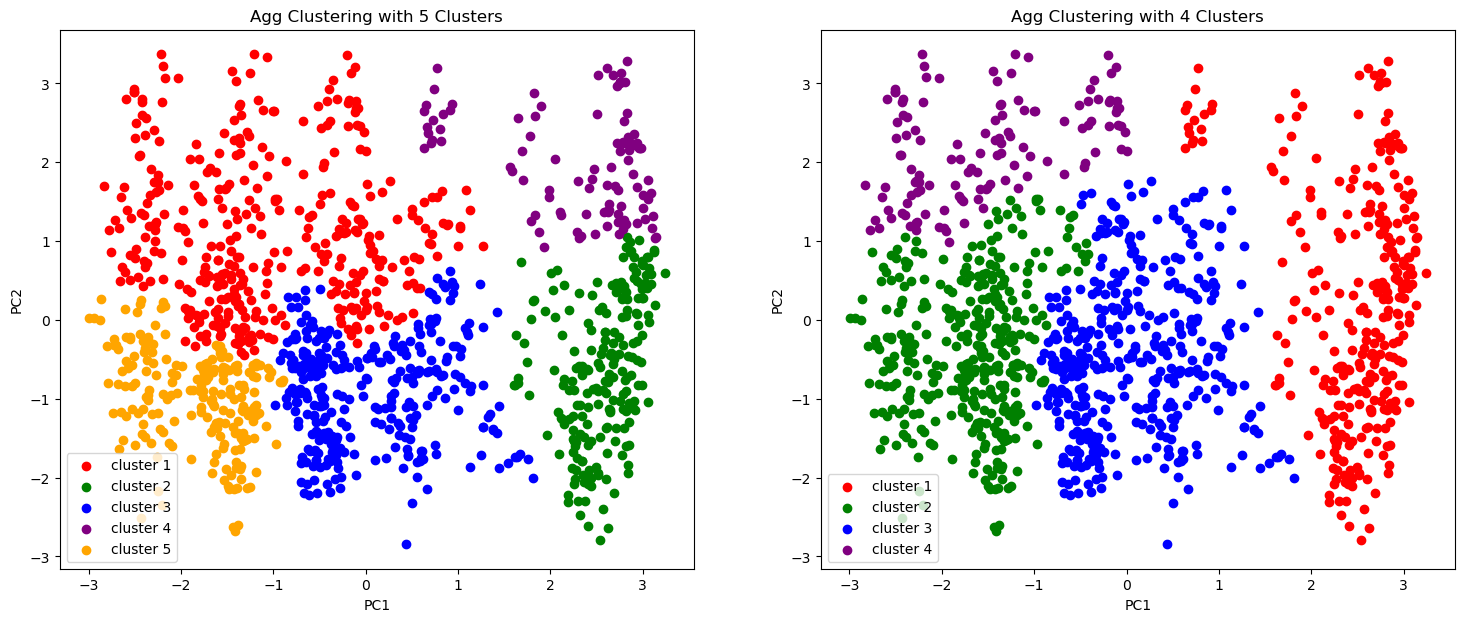

In [41]:
survey_p = pd.DataFrame(PCA(n_components = 2).fit_transform(survey))
preds = pd.Series(AgglomerativeClustering(n_clusters = 5,).fit_predict(survey_p))
survey_p = pd.concat([survey_p, preds], axis =1)
survey_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.subplot(121)
plt.scatter(survey_p[survey_p['target']==0].iloc[:,0], survey_p[survey_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(survey_p[survey_p['target']==1].iloc[:,0], survey_p[survey_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(survey_p[survey_p['target']==2].iloc[:,0], survey_p[survey_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(survey_p[survey_p['target']==3].iloc[:,0], survey_p[survey_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(survey_p[survey_p['target']==4].iloc[:,0], survey_p[survey_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agg Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

survey_p = pd.DataFrame(PCA(n_components = 2).fit_transform(survey))
preds = pd.Series(AgglomerativeClustering(n_clusters = 4,).fit_predict(survey_p))
survey_p = pd.concat([survey_p, preds], axis =1)
survey_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(survey_p[survey_p['target']==0].iloc[:,0], survey_p[survey_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(survey_p[survey_p['target']==1].iloc[:,0], survey_p[survey_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(survey_p[survey_p['target']==2].iloc[:,0], survey_p[survey_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(survey_p[survey_p['target']==3].iloc[:,0], survey_p[survey_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.legend()
plt.title('Agg Clustering with 4 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

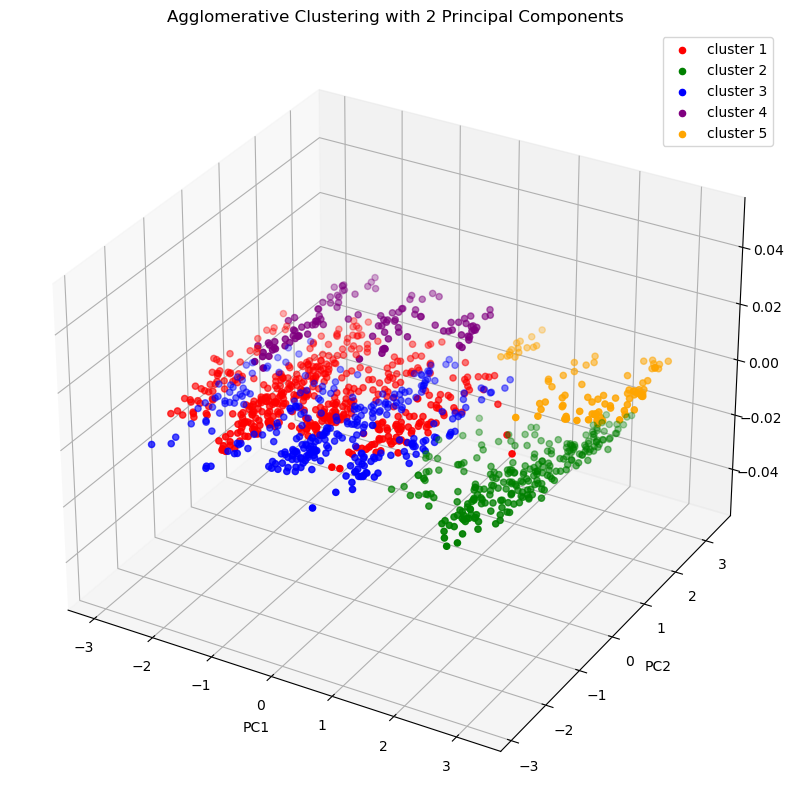

In [42]:
survey_p3 = pd.DataFrame(PCA(n_components = 3).fit_transform(survey))
preds = pd.Series(AgglomerativeClustering(n_clusters = 5,).fit_predict(survey_p3))
survey_p3 = pd.concat([survey_p3, preds], axis =1)
survey_p3.columns = [0,1,2, 'target']

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue', 'purple', 'orange']
ax.scatter(survey_p3[survey_p3['target']==0].iloc[:,0], survey_p3[survey_p3.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
ax.scatter(survey_p3[survey_p3['target']==1].iloc[:,0], survey_p3[survey_p3.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
ax.scatter(survey_p3[survey_p3['target']==2].iloc[:,0], survey_p3[survey_p3.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
ax.scatter(survey_p3[survey_p3['target']==3].iloc[:,0], survey_p3[survey_p3.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
ax.scatter(survey_p3[survey_p3['target']==4].iloc[:,0], survey_p3[survey_p3.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agglomerative Clustering with 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

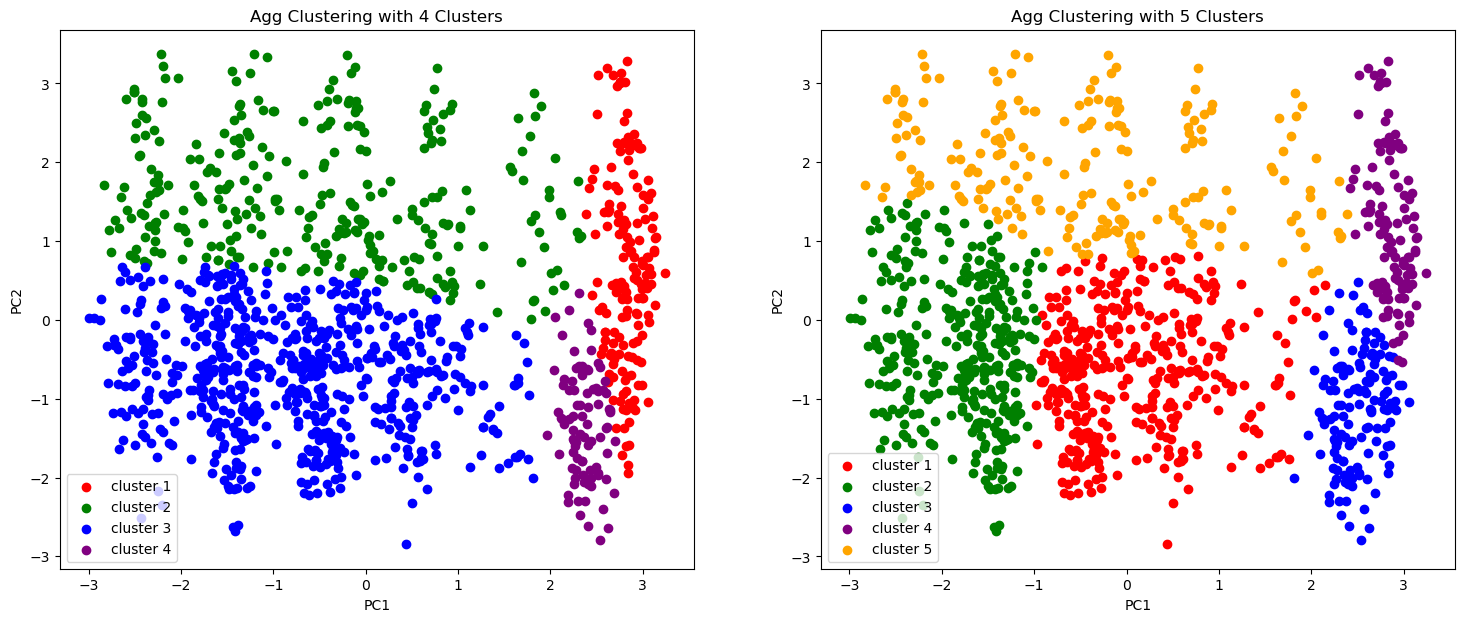

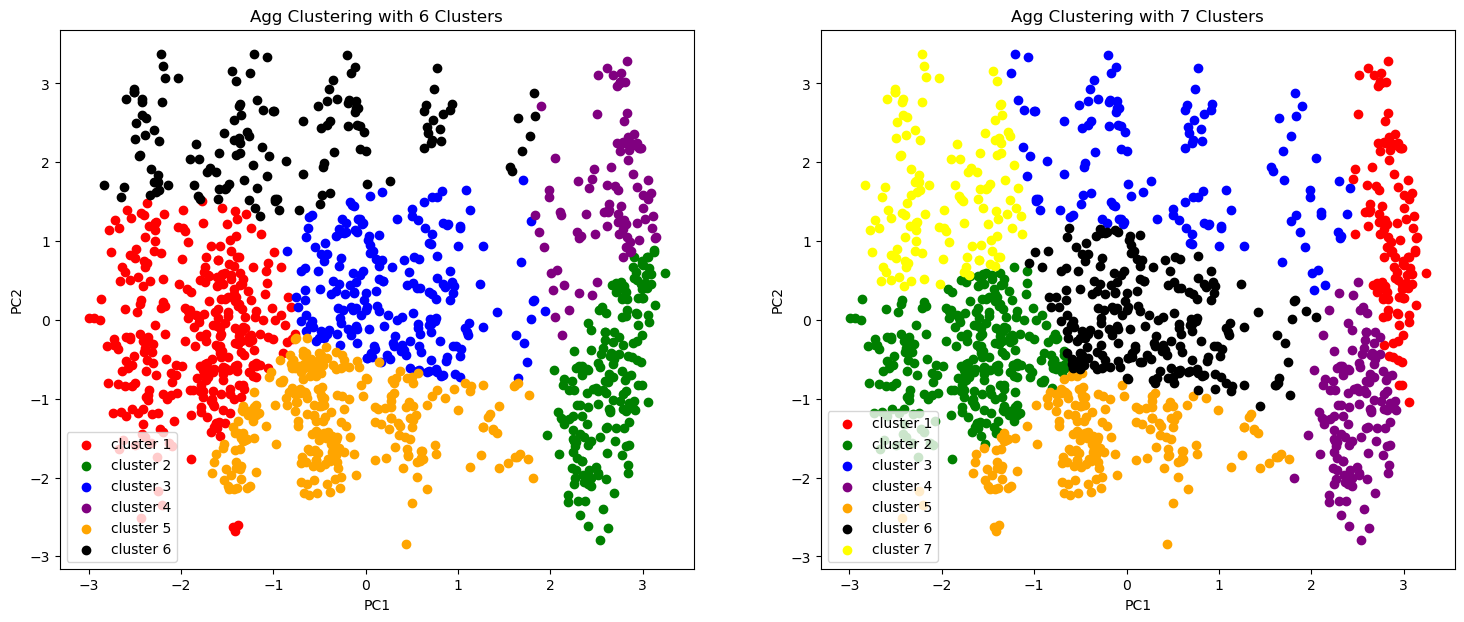

In [46]:
from sklearn.mixture import GaussianMixture

survey_p = pd.DataFrame(PCA(n_components = 2).fit_transform(survey))
preds = pd.Series(GaussianMixture(n_components = 5,).fit(survey_p).predict(survey_p))
survey_p = pd.concat([survey_p, preds], axis =1)
survey_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.subplot(122)
plt.scatter(survey_p[survey_p['target']==0].iloc[:,0], survey_p[survey_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(survey_p[survey_p['target']==1].iloc[:,0], survey_p[survey_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(survey_p[survey_p['target']==2].iloc[:,0], survey_p[survey_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(survey_p[survey_p['target']==3].iloc[:,0], survey_p[survey_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(survey_p[survey_p['target']==4].iloc[:,0], survey_p[survey_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agg Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

survey_p = pd.DataFrame(PCA(n_components = 2).fit_transform(survey))
preds = pd.Series(GaussianMixture(n_components = 4,).fit(survey_p).predict(survey_p))
survey_p = pd.concat([survey_p, preds], axis =1)
survey_p.columns = [0,1,'target']

plt.subplot(121)
plt.scatter(survey_p[survey_p['target']==0].iloc[:,0], survey_p[survey_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(survey_p[survey_p['target']==1].iloc[:,0], survey_p[survey_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(survey_p[survey_p['target']==2].iloc[:,0], survey_p[survey_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(survey_p[survey_p['target']==3].iloc[:,0], survey_p[survey_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.legend()
plt.title('Agg Clustering with 4 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')








survey_p = pd.DataFrame(PCA(n_components = 2).fit_transform(survey))
preds = pd.Series(GaussianMixture(n_components = 6,).fit(survey_p).predict(survey_p))
survey_p = pd.concat([survey_p, preds], axis =1)
survey_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black', 'yellow']
plt.subplot(121)
plt.scatter(survey_p[survey_p['target']==0].iloc[:,0], survey_p[survey_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(survey_p[survey_p['target']==1].iloc[:,0], survey_p[survey_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(survey_p[survey_p['target']==2].iloc[:,0], survey_p[survey_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(survey_p[survey_p['target']==3].iloc[:,0], survey_p[survey_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(survey_p[survey_p['target']==4].iloc[:,0], survey_p[survey_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(survey_p[survey_p['target']==5].iloc[:,0], survey_p[survey_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')

plt.legend()
plt.title('Agg Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

survey_p = pd.DataFrame(PCA(n_components = 2).fit_transform(survey))
preds = pd.Series(GaussianMixture(n_components = 7,).fit(survey_p).predict(survey_p))
survey_p = pd.concat([survey_p, preds], axis =1)
survey_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(survey_p[survey_p['target']==0].iloc[:,0], survey_p[survey_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(survey_p[survey_p['target']==1].iloc[:,0], survey_p[survey_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(survey_p[survey_p['target']==2].iloc[:,0], survey_p[survey_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(survey_p[survey_p['target']==3].iloc[:,0], survey_p[survey_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(survey_p[survey_p['target']==4].iloc[:,0], survey_p[survey_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(survey_p[survey_p['target']==5].iloc[:,0], survey_p[survey_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.scatter(survey_p[survey_p['target']==6].iloc[:,0], survey_p[survey_p.target==6].iloc[:,1], c = colors[6], label = 'cluster 7')

plt.legend()
plt.title('Agg Clustering with 7 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
plt.show()